In [9]:
from itertools import combinations, product
import numpy as np

In [30]:
import math

In [94]:
samples_1 = [{0}, {1}, {2}, {3}, {4}, {0, 1}, {3, 4}, {0, 1, 2}, set(), {0, 1, 2, 3, 4}]
# len_1 = [0, 0, 0, 0, 0, 4.0, 6.0, 10.0, 0, 23.0]
len_1 = [0, 0, 0, 0, 0, 5.0, 4.0, 3.0, 0, 0.0]
# tot_1 = len_1[-1]
tot_1 = 23.0
samples_2 = [{0}, {1}, {2}, {3}, {4}, {0, 1}, set(), {0, 1, 2}, {0, 1, 2, 3}, {0, 1, 2, 3, 4}]
# len_2 = [0, 0, 0, 0, 0, 4.0, 0.0, 10.0, 18.0, 26.0]
len_2 = [0, 0, 0, 0, 0, 5.0, 0, 3.0, 1.0, 0.0]
# tot_2 = len_2[-1]
tot_2 = 26.0

In [99]:
ts.at_index(0).edge_array

array([ 0,  1,  4,  2,  3,  5,  9, 10, -1, -1, -1], dtype=int32)

In [100]:
ts.at_index(1).edge_array

array([ 0,  1,  4,  6,  8,  5, -1,  7, 11, -1, -1], dtype=int32)

In [101]:
ts.tables.edges[ts.at_index(1).edge_array]

LibraryError: Edge out of bounds. (TSK_ERR_EDGE_OUT_OF_BOUNDS)

In [106]:
ts.at_index(1).edge_array[ts.at_index(1).edge_array != -1]

array([ 0,  1,  4,  6,  8,  5,  7, 11], dtype=int32)

In [110]:
def get_edge_table(tree_idx, ts):
    return ts.tables.edges[
        ts.at_index(tree_idx).edge_array[
            ts.at_index(tree_idx).edge_array != -1
        ]
    ]

In [125]:
get_edge_table(0, ts)

id,left,right,parent,child,metadata
0,0,20,5,0,
1,0,20,5,1,
2,0,20,7,2,
3,0,10,6,3,
4,0,10,6,4,
5,0,20,7,5,
6,0,10,9,6,
7,0,10,9,7,


In [173]:
ts.tables.nodes.time[ts.at_index(0).root]

7.0

In [163]:
t = 0
time = ts.tables.nodes.time
tot = 0
for e_x in get_edge_table(0, ts):
    for e_y in get_edge_table(1, ts):
        # t += len(samples_1[e_x.parent] & samples_2[e_y.parent]) * (7 - time[e_x.child]) * (7 - time[e_y.child])
        t += math.comb(len(samples_1[e_x.child] & samples_2[e_y.child]), 2) * (time[e_x.parent] - time[e_x.child]) * (time[e_y.parent] - time[e_y.child])
# t / (ts.at_index(0).total_branch_length * ts.at_index(1).total_branch_length)
# t / tot
t

43.0

In [95]:
t = 0
children = [0, 1, 3, 4, 2, 5, 3, 7, 4, 6, 7, 8]
for i, x in enumerate(len_1):
    for j, y in enumerate(len_2):
        # c = math.comb(len(samples_1[children[i]] & samples_2[children[j]]), 2)
        c = math.comb(len(samples_1[i] & samples_2[j]), 2)
        if c:
            print(c * x * y, c, x, y, samples_1[i] & samples_2[j])
            # print(c * x * y, c, x, y, children[i], children[j], samples_1[children[i]] & samples_2[children[j]])
        t += c * x * y
t

25.0 1 5.0 5.0 {0, 1}
15.0 1 5.0 3.0 {0, 1}
5.0 1 5.0 1.0 {0, 1}
0.0 1 5.0 0.0 {0, 1}
0.0 1 4.0 0.0 {3, 4}
15.0 1 3.0 5.0 {0, 1}
27.0 3 3.0 3.0 {0, 1, 2}
9.0 3 3.0 1.0 {0, 1, 2}
0.0 3 3.0 0.0 {0, 1, 2}
0.0 1 0.0 5.0 {0, 1}
0.0 3 0.0 3.0 {0, 1, 2}
0.0 6 0.0 1.0 {0, 1, 2, 3}
0.0 10 0.0 0.0 {0, 1, 2, 3, 4}


96.0

In [80]:
total

49

In [64]:
i

0

In [44]:
t = 0
for x, y in product(range(5, 9 + 1), repeat=2):
    # print(samples_1[x], samples_2[y], samples_1[x] & samples_2[y])
    # print(math.comb(len(samples_1[x] & samples_2[y]), 2) * (len_1[x] / tot_1) * (len_2[x] / tot_2))
    t += math.comb(len(samples_1[x] & samples_2[y]), 2) * (len_1[x] / tot_1) * (len_2[x] / tot_2)
t

21.779264214046822

In [59]:

t = 0
for x in [5, 6, 7, 9]:
    for y in [5, 7, 8, 9]:
        t += math.comb(len(samples_1[x] & samples_2[y]), 2) * (len_1[x]) * (len_2[x])
        # t += math.comb(len(samples_1[x] & samples_2[y]), 2) * (len_1[x] / tot_1) * (len_2[x] / tot_2)
t

13024.0

In [28]:
len(samples_1[x] & samples_2[y]) * (len_1[x] / tot_1) * (len_2[x] / tot_2)

5.0

In [51]:
e_ijij = np.sum([tmrca0[i, j] * tmrca0[i, j] for i, j in ij])
e_ijij / n_ij

67.83333333333333

In [52]:
e_ijik = np.sum([tmrca0[s(_i, _j)] * tmrca0[s(_i, _k)] for i, j in ij for _i, _j, _k in gen_ijk(i, j, 4)])
e_ijik / n_ijk

60.916666666666664

In [53]:
e_ijkl = np.sum([tmrca0[s(_i, _j)] * tmrca0[s(_k, _l)] for i, j in ij for _i, _j, _k, _l in gen_ijkl(i, j, 4)])
e_ijkl / n_ijkl

56.666666666666664

In [54]:
for i, j in ij:
    e_ijij -= tmrca0[i, j] * tmrca0[i, j]
    e_ijij += tmrca0[i, j] * tmrca1[i, j]

In [55]:
e_ijij / n_ij

72.66666666666667

In [56]:
for i, j in ij:
    for _i, _j, _k in gen_ijk(i, j, 4):
        e_ijik -= tmrca0[s(_i, _j)] * tmrca0[s(_i, _k)]
        e_ijik += tmrca0[s(_i, _j)] * tmrca1[s(_i, _k)]

In [57]:
e_ijik / n_ijk

67.75

In [58]:
for i, j in ij:
    for _i, _j, _k, _l in gen_ijkl(i, j, 4):
        e_ijkl -= tmrca0[s(_i, _j)] * tmrca0[s(_k, _l)]
        e_ijkl += tmrca0[s(_i, _j)] * tmrca1[s(_k, _l)]

In [60]:
e_ijkl / n_ijkl

71.5

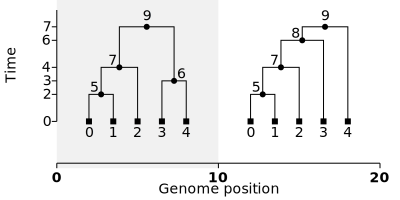

In [96]:
import io
import tskit

nodes = """\
is_sample time
1         0
1         0
1         0
1         0
1         0
0         2
0         3
0         4
0         6
0         7
"""

edges = """\
left   right   parent  child
0      20      5       0,1
0      10      6       3,4
0      20      7       5,2
0      10      9       7,6
10     20      8       7,3
10     20      9       8,4
"""

# sites = """\
# position ancestral_state
# """

# mutations = """\
# site node parent derived_state
# """

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    # sites=io.StringIO(sites),
    # mutations=io.StringIO(mutations),
    strict=False,
)

ts.draw_svg(y_axis=True)